### BANA274 Deep Learning Assignment 6

__Group 2 Project:__ Potato Chips Quality Control

__Team Members:__ Mehak Katra, Aysouda Vatanparast, Kentrick Kepawitono, Urvi Vaidya, Moiz Nawab, Shahin Chinichian Moghaddam

Using the same dataset from our previous Homework and using the best model from our last Homework

__Setting up our data__

In [1]:
# find your current directory
import os
curDir = os.getcwd()
print(curDir)

/Users/urvivaidya/Library/CloudStorage/OneDrive-Personal/MAC/UCI MSBA Coursework/Spring 2023/Deep Learning/HW5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import os

%matplotlib inline

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
import tensorflow as tf
print(tf.__version__)

2.13.0-rc0


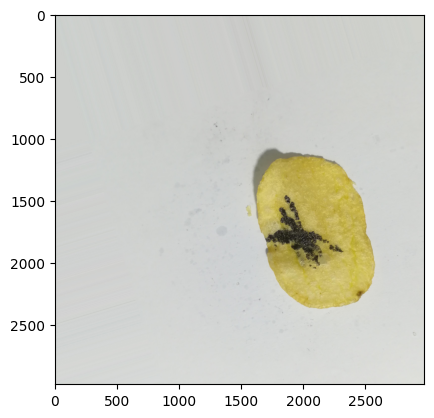

In [5]:
orig_im = Image.open('Augmented Train Set/Defected Chips/401_v1.jpg')
plt.imshow(orig_im)
plt.show()

__Loading and Normalizing our Train & Test Images to use in our model__

In [6]:
#Assign training set with labels
defective_train_dir = "Augmented Train Set/Defected Chips"
non_defective_train_dir = "Augmented Train Set/Non-defect Chips"


X_train_orig = []
Y_train_orig = []

image_size = (64, 64)

# Load the defective training images and assign a label of 0
for filename in os.listdir(defective_train_dir):
    if filename.endswith(".jpg"):
        filepath = os.path.join(defective_train_dir, filename)
        image = Image.open(filepath)
        image = image.resize(image_size)
        image = np.array(image)
        X_train_orig.append(image)
        Y_train_orig.append(0)

# Load the non-defective training images and assign a label of 1
for filename in os.listdir(non_defective_train_dir):
    if filename.endswith(".jpg"):
        filepath = os.path.join(non_defective_train_dir, filename)
        image = Image.open(filepath)
        image = image.resize(image_size) #original size = (2500,2500)
        image = np.array(image)
        X_train_orig.append(image)
        Y_train_orig.append(1)

X_train_orig = np.array(X_train_orig)
Y_train_orig = np.array(Y_train_orig)

In [7]:
# Load the test data

# Define the paths to the directories with the test images
defective_test_dir = "Augmented Test Set/Defect Chips"
non_defective_test_dir = "Augmented Test Set/No defect Chips"

#Creating divisions for defective and non-defective images
filenames1 = os.listdir(defective_test_dir)  
test_size1 = len(filenames1) // 2

filenames2 = os.listdir(non_defective_test_dir)
test_size2 = len(filenames2) // 2

test_filenames1 = filenames1[:test_size1]
crossval_filenames1 = filenames1[test_size1:]

test_filenames2 = filenames2[:test_size2]
crossval_filenames2 = filenames2[test_size2:]

X_test_orig = []
Y_test_orig = []
X_cv_orig = []
Y_cv_orig = []

image_size = (64, 64)

# Load the defective test & cross-validation images and assign a label of 0
for filename in test_filenames1:
    if filename.endswith(".jpg"):
        filepath = os.path.join(defective_test_dir, filename)
        image = Image.open(filepath)
        image = image.resize(image_size)
        image = np.array(image)
        X_test_orig.append(image)
        Y_test_orig.append(0)

for filename in crossval_filenames1:
    if filename.endswith(".jpg"):
        filepath = os.path.join(defective_test_dir, filename)
        image = Image.open(filepath)
        image = image.resize(image_size)
        image = np.array(image)
        X_cv_orig.append(image)
        Y_cv_orig.append(0)

# Load the non-defective test images and assign a label of 1
for filename in test_filenames2:
    if filename.endswith(".jpg"):
        filepath = os.path.join(non_defective_test_dir, filename)
        image = Image.open(filepath)
        image = image.resize(image_size)
        image = np.array(image)
        X_test_orig.append(image)
        Y_test_orig.append(1)

for filename in crossval_filenames2:
    if filename.endswith(".jpg"):
        filepath = os.path.join(non_defective_test_dir, filename)
        image = Image.open(filepath)
        image = image.resize(image_size)
        image = np.array(image)
        X_cv_orig.append(image)
        Y_cv_orig.append(1)
        
X_test_orig = np.array(X_test_orig)
Y_test_orig = np.array(Y_test_orig)

X_cv_orig = np.array(X_cv_orig)
Y_cv_orig = np.array(Y_cv_orig)

y = 0, it's a defective potato chip.


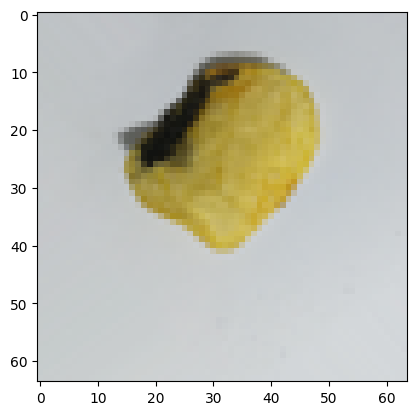

In [8]:
index=22
plt.imshow(X_train_orig[index])
if Y_train_orig[index] == 1:
    print ("y = " + str(Y_train_orig[index]) + ", it's a non-defective potato chip.")
else:
    print ("y = " + str(Y_train_orig[index]) + ", it's a defective potato chip.")

In [9]:
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]
m_cv = X_cv_orig.shape[0]
num_px = X_train_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of cross-validation examples: m_cv = " + str(m_cv))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_orig.shape))
print ("train_set_y shape: " + str(Y_train_orig.shape))
print ("test_set_x shape: " + str(X_test_orig.shape))
print ("test_set_y shape: " + str(Y_test_orig.shape))
print ("cv_set_x shape: " + str(X_cv_orig.shape))
print ("cv_set_y shape: " + str(Y_cv_orig.shape))

Number of training examples: m_train = 8469
Number of testing examples: m_test = 384
Number of cross-validation examples: m_cv = 384
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (8469, 64, 64, 3)
train_set_y shape: (8469,)
test_set_x shape: (384, 64, 64, 3)
test_set_y shape: (384,)
cv_set_x shape: (384, 64, 64, 3)
cv_set_y shape: (384,)


In [10]:
# Reshape the training and test examples
train_set_x_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1)
test_set_x_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1)
cv_set_x_flatten = X_cv_orig.reshape(X_cv_orig.shape[0],-1)


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(Y_train_orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(Y_test_orig.shape))
print ("cv_set_x_flatten shape: " + str(cv_set_x_flatten.shape))
print ("cv_set_y shape: " + str(Y_cv_orig.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (8469, 12288)
train_set_y shape: (8469,)
test_set_x_flatten shape: (384, 12288)
test_set_y shape: (384,)
cv_set_x_flatten shape: (384, 12288)
cv_set_y shape: (384,)
sanity check after reshaping: [211 194 228 215 214]


In [11]:
print ("train_set_x shape: " + str((train_set_x_flatten.shape)))
print ("train_set_y shape: " + str(Y_train_orig.shape))
print ("test_set_x shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(Y_test_orig.shape))
print ("cv_set_x shape: " + str(cv_set_x_flatten.shape))
print ("cv_set_y shape: " + str(Y_cv_orig.shape))

train_set_x shape: (8469, 12288)
train_set_y shape: (8469,)
test_set_x shape: (384, 12288)
test_set_y shape: (384,)
cv_set_x shape: (384, 12288)
cv_set_y shape: (384,)


In [12]:
#Standardizing dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
cv_set_x = cv_set_x_flatten/255.

In [13]:
X_train = X_train_orig/255
X_test = X_test_orig/255
X_cv = X_cv_orig/255

#### Q1. Use the dataset from your previous Homework and the best NN model you have so far.
- a. Create a TF checkpoint. Run your previous NN model and save the best weights after training.

#### Building our Model
- our best model was a model with hidden layer size[22,15,10]
- our learning rate was 0.002674757271187464
- our hidden layer used the relu function and the output layer used sigmoid
- we use the Adam optimizer

we will use the same hyperparameters to set up our model using tensorflow

In [78]:
# build the model

model = Sequential([
                    Dense(35, activation = 'relu', input_shape = (train_set_x.shape[1],)),
                    Dense(13, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

In [80]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 35)                430115    
                                                                 
 dense_35 (Dense)            (None, 13)                468       
                                                                 
 dense_36 (Dense)            (None, 8)                 112       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 430704 (1.64 MB)
Trainable params: 430704 (1.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# compile the model
model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.00267),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

In [81]:
# Define the checkpoint path
checkpoint_path = 'model_checkpoints/checkpoint'

# Define the ModelCheckpoint callback
checkpoint1 = ModelCheckpoint(filepath=checkpoint_path,
                             save_freq='epoch',
                             save_weights_only=True,
                             verbose=1)

In [84]:
# fit the model
history = model.fit(train_set_x, Y_train_orig, epochs = 20, batch_size = 32, verbose = 2, validation_data=(cv_set_x, Y_cv_orig), callbacks=[checkpoint1])


Epoch 1/20

Epoch 1: saving model to model_checkpoints/checkpoint
265/265 - 1s - loss: 0.7776 - binary_accuracy: 0.5244 - val_loss: 0.6574 - val_binary_accuracy: 0.7422 - 799ms/epoch - 3ms/step
Epoch 2/20

Epoch 2: saving model to model_checkpoints/checkpoint
265/265 - 1s - loss: 0.6644 - binary_accuracy: 0.5935 - val_loss: 0.6332 - val_binary_accuracy: 0.5391 - 506ms/epoch - 2ms/step
Epoch 3/20

Epoch 3: saving model to model_checkpoints/checkpoint
265/265 - 1s - loss: 0.6242 - binary_accuracy: 0.6389 - val_loss: 0.5437 - val_binary_accuracy: 0.8255 - 614ms/epoch - 2ms/step
Epoch 4/20

Epoch 4: saving model to model_checkpoints/checkpoint
265/265 - 1s - loss: 0.5680 - binary_accuracy: 0.6954 - val_loss: 0.5152 - val_binary_accuracy: 0.7422 - 607ms/epoch - 2ms/step
Epoch 5/20

Epoch 5: saving model to model_checkpoints/checkpoint
265/265 - 1s - loss: 0.6596 - binary_accuracy: 0.6342 - val_loss: 0.5117 - val_binary_accuracy: 0.7891 - 596ms/epoch - 2ms/step
Epoch 6/20

Epoch 6: saving mo

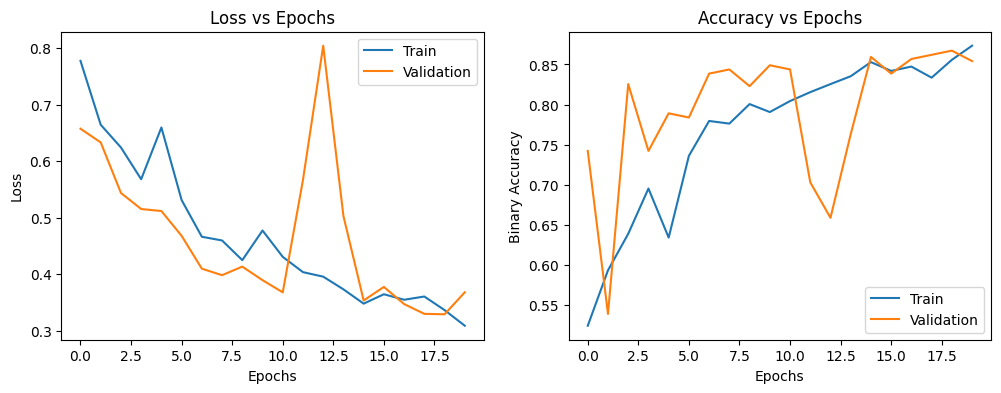

In [86]:
# Plot the training and validation loss
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['binary_accuracy'], label="Train")
ax.plot(epochs, frame['val_binary_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Binary Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

In [87]:
# Evaluate Model on test set
test_loss, test_accuracy = model.evaluate(test_set_x, Y_test_orig)

12/12 [==============================] - 0s 939us/step - loss: 0.2990 - binary_accuracy: 0.8646


#### Q2. Build a CNN model.
- a. The model should have four Conv1, Pool1, Conv2, and Pool2 layers, a flattened layer, followed by your FC layers.
- b. Save the best weights for your CNN model after training.
- c. Plot loss and metric(s) graphs.

In [170]:
# Define the CNN model
model_cnn = Sequential([
    Conv2D(6, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(6, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [171]:
# Compile the model
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [159]:
# Define the checkpoint path
checkpoint_path_cnn = 'cnn_checkpoints/checkpoint'

# Define the ModelCheckpoint callback
checkpoint_cnn = ModelCheckpoint(filepath=checkpoint_path_cnn,
                             save_freq='epoch',
                             save_weights_only=True,
                             verbose=1)

In [172]:
# fit model
history_cnn = model_cnn.fit(X_train, Y_train_orig, epochs = 10, batch_size = 32, verbose = 2, validation_data=(X_cv, Y_cv_orig), callbacks=[checkpoint_cnn])


Epoch 1/10

Epoch 1: saving model to cnn_checkpoints/checkpoint
265/265 - 3s - loss: 0.5460 - accuracy: 0.7538 - val_loss: 0.3674 - val_accuracy: 0.8438 - 3s/epoch - 11ms/step
Epoch 2/10

Epoch 2: saving model to cnn_checkpoints/checkpoint
265/265 - 3s - loss: 0.1912 - accuracy: 0.9380 - val_loss: 0.1727 - val_accuracy: 0.9271 - 3s/epoch - 13ms/step
Epoch 3/10

Epoch 3: saving model to cnn_checkpoints/checkpoint
265/265 - 4s - loss: 0.1403 - accuracy: 0.9525 - val_loss: 0.1481 - val_accuracy: 0.9453 - 4s/epoch - 17ms/step
Epoch 4/10

Epoch 4: saving model to cnn_checkpoints/checkpoint
265/265 - 4s - loss: 0.1144 - accuracy: 0.9622 - val_loss: 0.1057 - val_accuracy: 0.9583 - 4s/epoch - 16ms/step
Epoch 5/10

Epoch 5: saving model to cnn_checkpoints/checkpoint
265/265 - 4s - loss: 0.0967 - accuracy: 0.9661 - val_loss: 0.1032 - val_accuracy: 0.9635 - 4s/epoch - 17ms/step
Epoch 6/10

Epoch 6: saving model to cnn_checkpoints/checkpoint
265/265 - 5s - loss: 0.0831 - accuracy: 0.9725 - val_los

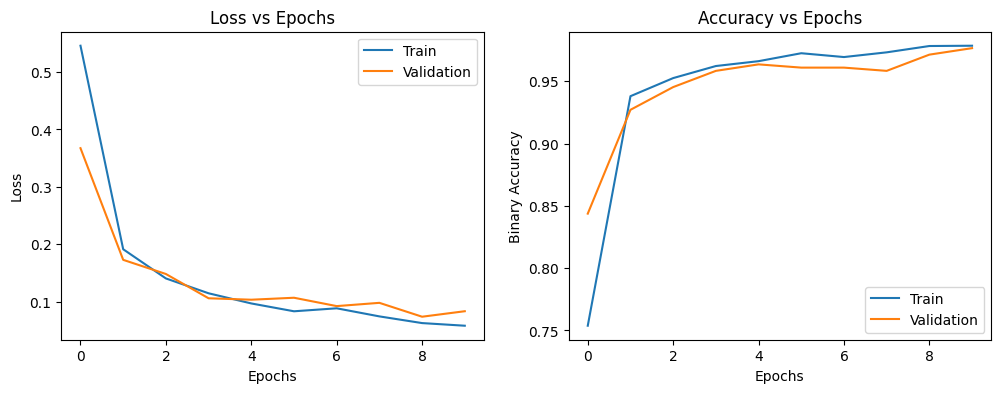

In [173]:
# Plot the training and validation loss
frame = pd.DataFrame(history_cnn.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['accuracy'], label="Train")
ax.plot(epochs, frame['val_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Binary Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

In [174]:
test_loss, test_accuracy = model_cnn.evaluate(X_test, Y_test_orig)


12/12 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9609


#### Q3. Compare your previous model and your CNN model.
- a. Load the weights from your previous NN model and your CNN model.
- b. Randomly select 5 images from the test set.
- c. Using your previous model, predict the corresponding labels. Similarly, using your
CNN model, predict the corresponding labels. Display the images with their predicted labels.

In [176]:
# loading weights from the previous model
# Create a new instance of the previous model
model_instance = Sequential([
                    Dense(35, activation = 'relu', input_shape = (train_set_x.shape[1],)),
                    Dense(13, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_instance.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.00267),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

# Load the weights from the saved checkpoint
model_instance.load_weights(checkpoint_path)

# Now the model is loaded with the saved weights and ready for prediction or further training.



In [178]:
# loading weights from the CNN model
# Create a new instance of the model
cnn_model_instance = Sequential([
    Conv2D(6, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(6, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model_instance.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Load the weights from the checkpoint
cnn_model_instance.load_weights(checkpoint_path_cnn)

# Now the loaded_model has the same architecture and weights as the trained model


1/1 [==============================] - 0s 37ms/step


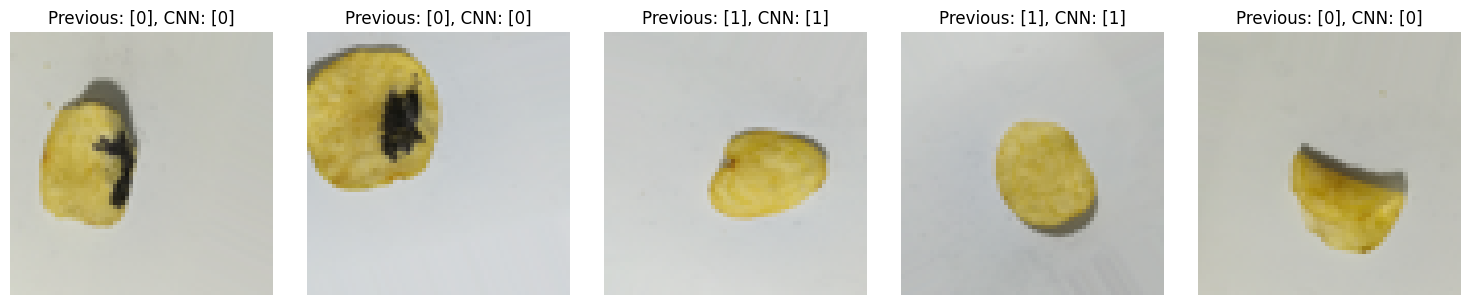

In [179]:
# Randomly select 5 images from the test set
random_indices = np.random.choice(range(test_set_x.shape[0]), size=5, replace=False)
selected_images = test_set_x[random_indices]
selected_images_cnn = X_test[random_indices]
selected_labels = Y_test_orig[random_indices]

# Use previous model to predict labels
nn_predictions = model_instance.predict(selected_images)
nn_predictions = np.where(nn_predictions > 0.5, 1, 0)

# Use CNN model to predict labels
cnn_predictions = cnn_model_instance.predict(selected_images_cnn)
cnn_predictions = np.where(cnn_predictions > 0.5, 1, 0)

# Display images with predicted labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(selected_images_cnn[i])
    ax.set_title(f'Previous: {nn_predictions[i]}, CNN: {cnn_predictions[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


__Q3. Part d. Does your CNN model beat the performance of your previous NN model?__

__Answer:__ Yes the CNN model performs much better than the previous NN model. 

Our defective chips have label 0 and non defective chips have label 1. From our 5 random test images, we can see that the both the NN model and CNN model got all the predictions right.

| model | Train Accuracy | Val Accuracy | Test accuracy |
| --- | --- | --- | --- |
| NN Model | 0.8733 | 0.8542| 0.8646 | 
| CNN Model | 0.9785 | 0.9766 | 0.9609 |

Our model comparisons show that the CNN model has higher accuracy.